## "50 startups"

## "Спрогнозировать, в какие компании инвестировать для максимизации прибыли"

### План работы:
#### 0. Введение 
##### 1)описание
##### 2)данные
##### 3)вопросы
#### 1. Импорт библиотек, загрузка данных 
##### 1)импорт библиотек
##### 2)загрузка данных
#### 2. Исследовательский анализ данных 
##### 1)info, head
##### 2)наблюдение за целевой переменной (описание + визуализация)
##### 3)список числовых и категориальных признаков
##### 4)список данных с отсутствующими значениями, заполнение пропущенных значений
##### 5)визуализация числовых и категориальных признаков
#### 3. Обработка и преобразование данных
##### 1)One-Hot Encoding
##### 2)создание наборов данных для части ML
##### 3)разделение Train/Test
#### 4. Машинное обучение
##### 1)ML Models (Linear regression)
##### -создание, обучение, оценка и визуализация модели
##### -создание окончательных прогнозов с помощью тестового набора
##### -сравнение моделей
##### 2)ML Models (Linear regression, Gradient Boosting Regression)
##### -создание, обучение, оценка и визуализация модели
##### -создание окончательных прогнозов с помощью тестового набора
##### 3)сравнение моделей
#### 5. Заключение

### 0. Введение

#### Описание

Набор данных содержит данные о 50 стартапах. Датасет имеет 7 столбцов: “ID”, “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Category”, “Profit”

#### Данные

ID - ID

R&D Spend - сколько каждый стартап тратит на исследования и разработки

Administration - сколько стартап тратит на администрирование

Marketing Spend - сколько стартап тратит на маркетинг

State - в каком штате находится стартап

Category -  к какой бизнес-категории относится стартап

Profit - прибыль, полученная стартапом

#### Вопросы

Предсказать, в какие компании инвестировать для максимизации прибыли (выбрать модель с лучшим результатом, создать прогнозы, выбрать компании)

### 1. Импорт библиотек, загрузка данных

#### Импорт библиотек

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats

from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

#### Загрузка данных

In [2]:
train = pd.read_csv("C:/Users/DIMA/Data Science/train.csv")
test = pd.read_csv("C:/Users/DIMA/Data Science/test.csv")

In [3]:
# определение таргета
target = train['Profit']

### 2. Исследовательский анализ данных

#### Info, head

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     object 
 5   Category         49 non-null     object 
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     object 
 5   Category         50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


In [6]:
train.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category,Profit
0,0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


In [7]:
test.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category
0,0,165349.20,136897.80,471784.10,New York,Industrials
1,1,162597.70,151377.59,443898.53,California,Technology
2,2,153441.51,101145.55,407934.54,Florida,Healthcare
3,3,144372.41,118671.85,383199.62,New York,Financials
4,4,142107.34,91391.77,366168.42,Florida,Industrials


#### Наблюдение за целевой переменной (описание + визуализация)

In [8]:
target.describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

C:\Users\DIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

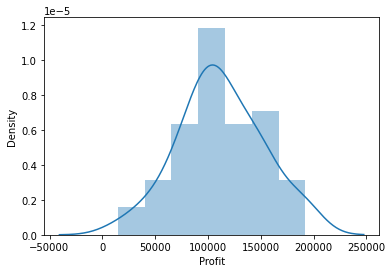

In [9]:
sns.distplot(target)

In [10]:
#перенос ID в индекс
train = train.set_index('ID')
test = test.set_index('ID')

In [11]:
#меняем название колонок
train = train.rename(columns={'R&D Spend': 'RD_Spend', 'Marketing Spend': 'Marketing_Spend'})
test = test.rename(columns={'R&D Spend': 'RD_Spend', 'Marketing Spend': 'Marketing_Spend'})

#### Cписок числовых и категориальных признаков

In [12]:
#Число количественных значений
count_numerical_train = train.dtypes[train.dtypes != 'object'].index
print(len(count_numerical_train))

4


In [13]:
#Названия количественных значений
print(train[count_numerical_train].columns)

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit'], dtype='object')


In [14]:
#Число категориальных значений
count_categorical_train = train.dtypes[train.dtypes == 'object'].index
print(len(count_categorical_train))

2


In [15]:
#Названия категориальных значений
print(train[count_categorical_train].columns)

Index(['State', 'Category'], dtype='object')


#### Cписок данных с отсутствующими значениями, заполнение пропущенных значений

In [16]:
train.isna().sum()

RD_Spend           2
Administration     0
Marketing_Spend    3
State              0
Category           1
Profit             0
dtype: int64

In [17]:
test.isna().sum()

RD_Spend           2
Administration     2
Marketing_Spend    0
State              1
Category           0
dtype: int64

Заполняем пропущеные значения:

R&D Spend, Administration, Marketing Spend - mean

State, Category - None

In [18]:
train_RD_Spend_mean = train.RD_Spend.mean()
train['RD_Spend'] = train.RD_Spend.fillna(train_RD_Spend_mean)
train_Marketing_Spend_mean = train.Marketing_Spend.mean()
train['Marketing_Spend'] = train.Marketing_Spend.fillna(train_Marketing_Spend_mean)
train['Category'] = train.Category.fillna('None')

In [19]:
test_RD_Spend_mean = test.RD_Spend.mean()
test['RD_Spend'] = test.RD_Spend.fillna(test_RD_Spend_mean)
test_Administration_mean = test.Administration.mean()
test['Administration'] = test.Administration.fillna(test_Administration_mean)
test['State'] = test.State.fillna('None')

In [20]:
train.isna().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Category           0
Profit             0
dtype: int64

In [21]:
test.isna().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Category           0
dtype: int64

#### Визуализация числовых и категориальных признаков

C:\Users\DIMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DIMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DIMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


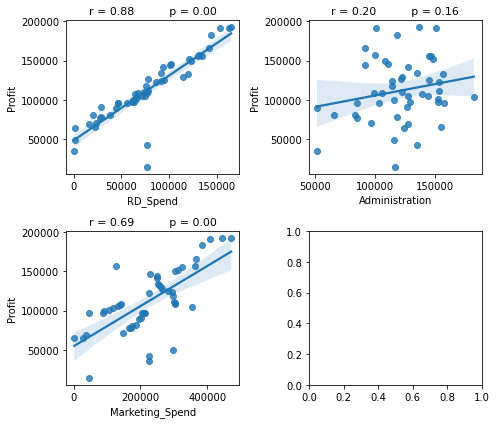

In [22]:
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize = (nr_cols * 3.5, nr_rows *3))

num_feats = list(count_numerical_train)
not_plot = ['ID', 'Profit']
plot_num_feats = [c for c in list(count_numerical_train) if c not in not_plot]

for r in range (0, nr_rows):
    for c in range (0, nr_cols):
        i =r * nr_cols + c
        if i < len(plot_num_feats):
            sns.regplot(train[plot_num_feats[i]], train['Profit'], ax = axs[r][c])
            stp = stats.pearsonr(train[plot_num_feats[i]], train['Profit'])
            
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "          " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)
            
            
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='State', ylabel='Profit'>

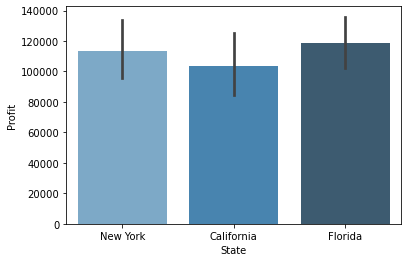

In [23]:
sns.barplot(x='State', y='Profit', data=train, palette='Blues_d')

<AxesSubplot:xlabel='Category', ylabel='Profit'>

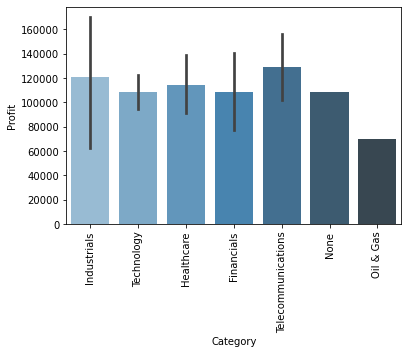

In [24]:
plt.xticks(rotation=90)
sns.barplot(x='Category', y='Profit', data=train, palette='Blues_d')

### 3. Обработка и преобразование данных

#### One-Hot Encoding

In [25]:
train = pd.get_dummies(train, columns=['State', 'Category'])

In [26]:
train.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_None,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,192261.83,0,0,1,0,0,1,0,0,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0,0,1,0,0,0,0,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1,1,0,0,0,0,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1,0,0,0,1,0,0,0,0


In [27]:
train.shape

(50, 14)

In [28]:
test = pd.get_dummies(test, columns=['State', 'Category'])

In [29]:
test.head()

,RD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_New York,State_None,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,0,1,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,0,1,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,0,1,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,0,1,0,0,0


In [30]:
test.shape

(50, 13)

In [31]:
train = train.drop(columns=['Profit', 'Category_None'])
test = test.drop(columns=['State_None'])

#### Cоздание наборов данных для части ML

In [32]:
X = train
y = target
X_test = test

#### Разделение Train/Test

In [33]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
X_train.shape

(35, 12)

In [35]:
x_test.shape

(15, 12)

### 4. Машинное обучение

#### ML Models (Linear regression)

##### Cоздание, обучение, оценка и визуализация модели

In [36]:
LR = LinearRegression()

LR.fit(X_train, y_train)

LR_pred = LR.predict(x_test)
LR_pred

array([ 98805.75002446, 120582.06246646, 137745.21283983,  79034.09403155,
       188946.03574103, 118622.88055624,  72254.79066   ,  67164.69815167,
       128666.63674181, 142782.3087556 ,  91593.10175464,  80612.80343627,
       101576.44119369, 101521.36354767, 125192.09524706])

In [46]:
LRMetrics = pd.DataFrame({'Model': 'Linear_Regression', 
                         'r2score': r2_score(y_test, LR_pred),
                         'MAE': metrics.mean_absolute_error(y_test, LR_pred),
                         'MSE': metrics.mean_squared_error(y_test, LR_pred),
                         'RMSE': np.sqrt(metrics.mean_squared_error(y_test, LR_pred)),
                         'MSLE': metrics.mean_squared_log_error(y_test, LR_pred),
                         'RMSLE': np.sqrt(metrics.mean_squared_log_error(y_test, LR_pred))
                         },index=[1])


LRMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear_Regression,0.789688,11029.42834,2.030035e+08,14247.930908,0.019417,0.139346


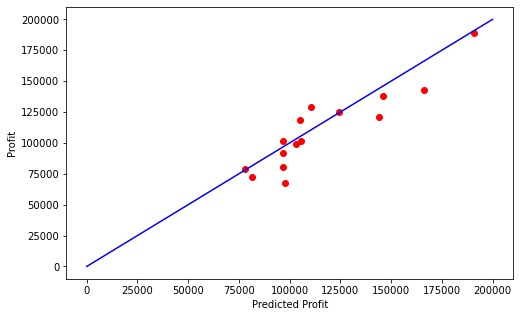

In [64]:
#Построим линейный график
plt.figure(figsize=(8,5))
pl.plot(y_test, LR_pred, 'ro')
pl.plot([0, 200000],[0, 200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

##### Cоздание окончательных прогнозов с помощью тестового набора

In [65]:
LR_pred_1 = LR.predict(X_test)
LR_pred_1

array([173426.18101741, 189136.03555657, 188946.03574103, 172036.55217563,
       142782.3087556 , 167404.74613989, 149507.66869685, 157587.3922617 ,
       161999.46205811, 156553.51538032, 139352.35038226, 120582.06246646,
       123602.43674921, 100870.47894581, 145214.20798084, 136337.33249719,
       115045.39296363, 128341.08289509, 125192.09524706, 120516.13649408,
       112463.0053601 , 124542.37179041, 128666.63674181, 109208.23838339,
       109268.13666644, 103605.55516326, 101576.44119369, 118622.88055624,
        97349.61154671,  96055.59746149,  97834.88695235,  67164.69815167,
        79791.40130303,  91593.10175464, 101521.36354767,  80612.80343627,
        75658.16264028,  81945.35628307,  72254.79066   ,  74848.96219321,
        87297.82122284,  79034.09403155,  73120.64657189,  69758.98      ,
        54155.9502917 ,  48109.28237089,  70180.21341563, 102747.18569225,
        34091.10390916,  66953.92003678])

In [67]:
LRMetrics1 = pd.DataFrame({'Model': 'Linear_Regression', 
                         'r2score': r2_score(y, LR_pred_1),
                         'MAE': metrics.mean_absolute_error(y, LR_pred_1),
                         'MSE': metrics.mean_squared_error(y, LR_pred_1),
                         'RMSE': np.sqrt(metrics.mean_squared_error(y, LR_pred_1)),
                         'MSLE': metrics.mean_squared_log_error(y, LR_pred_1),
                         'RMSLE': np.sqrt(metrics.mean_squared_log_error(y, LR_pred_1))
                         },index=[1])


LRMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear_Regression,0.826878,11442.48225,2.756271e+08,16602.021239,0.077744,0.278826


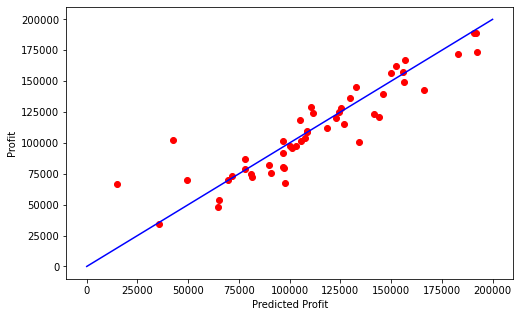

In [68]:
#Построим линейный график
plt.figure(figsize=(8,5))
pl.plot(y, LR_pred_1, 'ro')
pl.plot([0, 200000],[0, 200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

##### Cравнение моделей

In [70]:
#Сравним актуальный "Profit" из train датасета с предсказанным "Profit" из test датасета 
actualvspredicted = pd.DataFrame({'Actual Profit': y, 'LR Predicted Profit': LR_pred_1})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit
0,192261.830000,173426.181017
1,191792.060000,189136.035557
2,191050.390000,188946.035741
3,182901.990000,172036.552176
4,166187.940000,142782.308756
5,156991.120000,167404.746140
6,156122.510000,149507.668697
7,155752.600000,157587.392262
8,152211.770000,161999.462058
9,149759.960000,156553.515380


#### ML Models (Gradient Boosting Regression)

##### Cоздание, обучение, оценка и визуализация модели

In [71]:
GB = GradientBoostingRegressor(random_state=0)

GB.fit(X_train, y_train)

GB_pred = GB.predict(x_test)
GB_pred

array([ 99549.89357294, 135798.71119382, 133953.76339085,  83333.46208317,
       182312.33020149, 115017.2936342 ,  65985.21951611,  67319.94705424,
       113088.74948464, 170184.03117736,  89993.81533634,  89806.79103934,
       100703.62829827,  95465.26657434, 135659.5660787 ])

In [72]:
GBMetrics = pd.DataFrame({'Model': 'Linear_Regression', 
                         'r2score': r2_score(y_test, GB_pred),
                         'MAE': metrics.mean_absolute_error(y_test, GB_pred),
                         'MSE': metrics.mean_squared_error(y_test, GB_pred),
                         'RMSE': np.sqrt(metrics.mean_squared_error(y_test, GB_pred)),
                         'MSLE': metrics.mean_squared_log_error(y_test, GB_pred),
                         'RMSLE': np.sqrt(metrics.mean_squared_log_error(y_test, GB_pred))
                         },index=[1])


GBMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear_Regression,0.871975,8794.067752,1.235755e+08,11116.451707,0.015324,0.123789


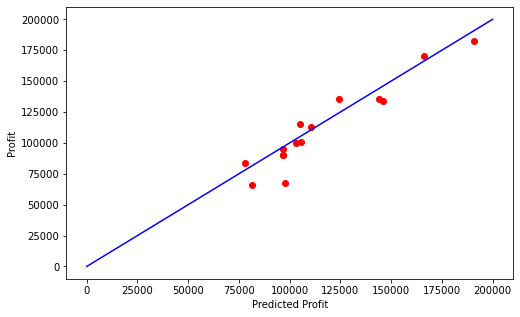

In [73]:
#Построим линейный график
plt.figure(figsize=(8,5))
pl.plot(y_test, GB_pred, 'ro')
pl.plot([0, 200000],[0, 200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

##### Cоздание окончательных прогнозов с помощью тестового набора

In [74]:
GB_pred_1 = GB.predict(X_test)
GB_pred_1

array([191867.62412877, 191631.05238384, 182312.33020149, 182851.07019825,
       170184.03117736, 156991.18174795, 156065.18337778, 155657.3156548 ,
       152090.77310553, 150395.82943541, 135833.10096525, 135798.71119382,
       140540.49969677, 134579.63175502, 132595.76221416, 130294.55614165,
       125793.92655291, 126209.72285288, 135659.5660787 , 122882.32584237,
       117835.38481012, 111969.75024449, 113088.74948464, 110496.69885551,
       108543.71533736, 106782.00926405, 100703.62829827, 115017.2936342 ,
        97761.05228023, 100662.1422931 , 100154.39192354,  67319.94705424,
        97320.64222056,  89993.81533634,  95465.26657434,  89806.79103934,
        90445.08322914,  90910.6120068 ,  65985.21951611,  81197.13795016,
        87371.73375666,  83333.46208317,  71349.24006266,  69736.52264338,
        65210.21519883,  65096.65246463,  49789.84064265,  54095.08217819,
        48882.78764903,  14431.4364362 ])

In [75]:
GBMetrics1 = pd.DataFrame({'Model': 'Linear_Regression', 
                         'r2score': r2_score(y, GB_pred_1),
                         'MAE': metrics.mean_absolute_error(y, GB_pred_1),
                         'MSE': metrics.mean_squared_error(y, GB_pred_1),
                         'RMSE': np.sqrt(metrics.mean_squared_error(y, GB_pred_1)),
                         'MSLE': metrics.mean_squared_log_error(y, GB_pred_1),
                         'RMSLE': np.sqrt(metrics.mean_squared_log_error(y, GB_pred_1))
                         },index=[1])


GBMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear_Regression,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


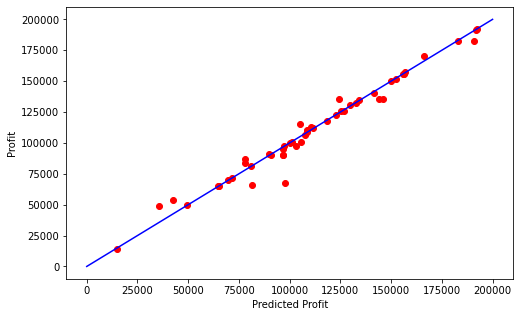

In [76]:
#Построим линейный график
plt.figure(figsize=(8,5))
pl.plot(y, GB_pred_1, 'ro')
pl.plot([0, 200000],[0, 200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

#### Cравнение моделей

In [78]:
frames = [LRMetrics1, GBMetrics1]
TrainingResult = pd.concat(frames)
TrainingResult

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear_Regression,0.826878,11442.482250,2.756271e+08,16602.021239,0.077744,0.278826
1,Linear_Regression,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


In [79]:
#Сравним актуальный "Profit" из train датасета с предсказанным "Profit" из test датасета 
actualvspredicted = pd.DataFrame({'Actual Profit': y, 'LR Predicted Profit': LR_pred_1, 'GB Predicted Profit': GB_pred_1})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit,GB Predicted Profit
0,192261.830000,173426.181017,191867.624129
1,191792.060000,189136.035557,191631.052384
2,191050.390000,188946.035741,182312.330201
3,182901.990000,172036.552176,182851.070198
4,166187.940000,142782.308756,170184.031177
5,156991.120000,167404.746140,156991.181748
6,156122.510000,149507.668697,156065.183378
7,155752.600000,157587.392262,155657.315655
8,152211.770000,161999.462058,152090.773106
9,149759.960000,156553.515380,150395.829435


##### Вывод: Лучшей моделью предсказания является Gradient Boosting Regression, где R2 score = 0.972002

### 5. Заключение

In [83]:
#Вывод компаний с наибольшим Profit
sub = pd.DataFrame()
sub['ID'] = test.index
sub['Profit'] = GB_pred_1
sub.head()

,ID,Profit
0,0,191867.624129
1,1,191631.052384
2,2,182312.330201
3,3,182851.070198
4,4,170184.031177


In [81]:
sub.to_csv('StartupPredictions.csv', index=False)